In [144]:
# pramble
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

# Part 1 | Exploration

Dataset from [kaggle link](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data)

In [ ]:
# reading player data
players = pd.read_csv('data/online_gaming_behavior_dataset.csv')


In [163]:
# finding structure of dataset

players.info()

print('players.columns')

players.head()


<class 'pandas.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  str    
 3   Location                   40034 non-null  str    
 4   GameGenre                  40034 non-null  str    
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  str    
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  str    
dtypes: float64(1), int64(7), str(5)
memory usage: 4.0 MB
play

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [168]:
# age demographic of players
print('Maximum age of players is {}'.format(players['Age'].max()))
print('Min agimume of players is {}'.format(players['Age'].min()))

AgeSpan = players['Age'].max() - players['Age'].min()


Ages = players[['PlayerId', 'Age']].groupby('Age')

print(Ages)


Maximum age of players is 49
Min agimume of players is 15


KeyError: "['PlayerId'] not in index"

In [162]:
# Converting start_time (and duration) in match to Timestamp datatype and adding to appended coloumns 

match['start_datetime'] = match['start_time'].apply(datetime.datetime.fromtimestamp)
match['end_datetime'] = (match['start_time'] + match['duration']).apply(datetime.datetime.fromtimestamp)

# separating datetime into dat month year | optional, I may remove this later
match['start_day'] = match['start_datetime'].apply(lambda x: x.day)
match['start_month'] = match['start_datetime'].apply(lambda x: x.month)
match['start_year'] = match['start_datetime'].apply(lambda x: x.year)

# It looks like all the data is only across 18 days! this isn't ideal


KeyError: 'start_time'

I don't want to know about most of the data in match so I'm going to just pick out the data I do care about

In [94]:
match = match[['match_id', 'start_datetime', 'end_datetime']]
players = players[['match_id', 'account_id', 'hero_id', 'kills', 'deaths']]


In [95]:
# merging the two dataframes

player_matches = players.merge(match, on='match_id', how = 'left') 

# remocing account_numebr = zero entries as theses are annonymous players whos behaviour cannot be tracked across games 
player_matches = player_matches[player_matches['account_id'] != 0]  

# Finding how mamy unique players there are
numof_players = players['account_id'].nunique()
print('players have an average of ' + str(round( numof_players/31883 * 10) /10) + ' games in total')



players have an average of 5.0 games in total


We should plot something now 

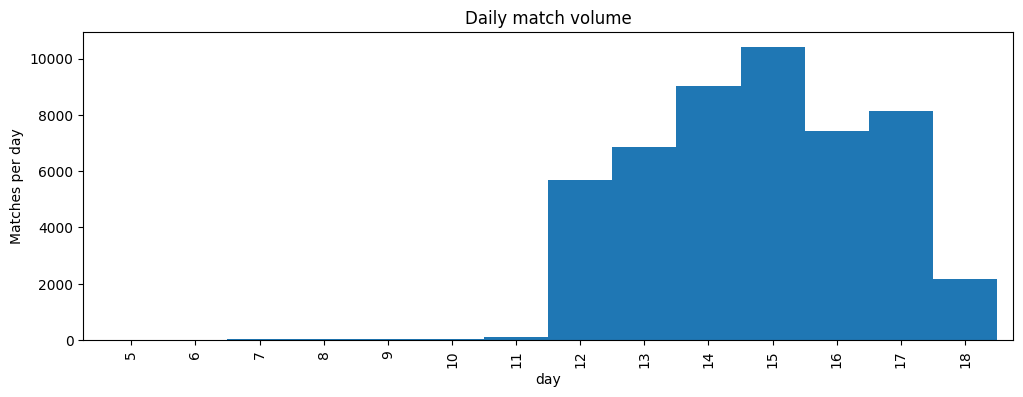

In [143]:

# maybe start by number of players per day?

player_matches['day'] = player_matches['start_datetime'].apply(lambda x: x.day)

num_matches = player_matches.groupby('day')['match_id'].nunique()

num_matches.sort_index().plot.bar(figsize=(12, 4), width = 1)
plt.ylabel("Matches per day")
plt.title("Daily match volume")
plt.show()

# print(num_matches.values)
 

# sns.histplot(x= num_matches.values, bins = 13, stat='percent') #will this work?

